Ao modelar a temperatura média do dia como variável aleatória e ignorar a dependência temporal, você está tratando cada observação diária como independente e identicamente distribuída (i.i.d.), o que simplifica bastante a análise.

# Histograma da Temperatura Média Diária em Porto Alegre (°C) vs Frequencia
# Teste de Normalidade (Shapiro-Wilk) da Temperatura Média Diária

         Data   MAX    MED   MIN
0  01/01/2020  34.5  27.24  24.3
1  02/01/2020  27.8  23.78  21.2
2  03/01/2020  27.9  22.94  19.5
3  04/01/2020  29.1  23.75  20.5
4  05/01/2020  33.1  25.35  19.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    366 non-null    object 
 1   MAX     366 non-null    float64
 2   MED     366 non-null    float64
 3   MIN     366 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.6+ KB
None
Estatística do teste de Shapiro-Wilk: 0.9784966050542364
P-valor: 2.840127423154376e-05
Rejeita-se a hipótese nula de normalidade (os dados não parecem ser normalmente distribuídos).


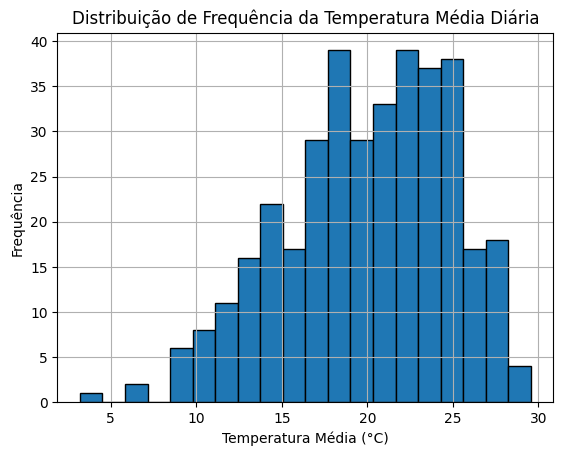

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Load the dataset
df = pd.read_csv('temperatura_poa.csv', sep=';')

# Inspect the data
print(df.head())
print(df.info())

# Plot the histogram of the average temperature ('MED')
plt.hist(df['MED'], bins=20, edgecolor='black')
plt.title('Distribuição de Frequência da Temperatura Média Diária')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência')
plt.grid(True)
plt.savefig('temperatura_media_histogram.png')


# Perform the Shapiro-Wilk test on the 'MED' column
stat, p_value = shapiro(df['MED'])

# Print the results
print(f'Estatística do teste de Shapiro-Wilk: {stat}')
print(f'P-valor: {p_value}')

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print('Não se pode rejeitar a hipótese nula de normalidade (os dados parecem ser normalmente distribuídos).')
else:
    print('Rejeita-se a hipótese nula de normalidade (os dados não parecem ser normalmente distribuídos).')

# Ajustes de distribuições normal e gama
# Teste de Hipóteses (K-S)

Resultados dos Testes de Kolmogorov-Smirnov (K-S)
--------------------------------------------------
Critério de Decisão (Nível de Significância alpha): 0.05

Distribuição Normal:
  P-valor calculado: 0.1112
  Conclusão: Como o p-valor é MAIOR que 0.05, NÃO SE REJEITA a hipótese nula.

Distribuição Gama:
  P-valor calculado: 0.0608
  Conclusão: Como o p-valor é MAIOR que 0.05, NÃO SE REJEITA a hipótese nula.


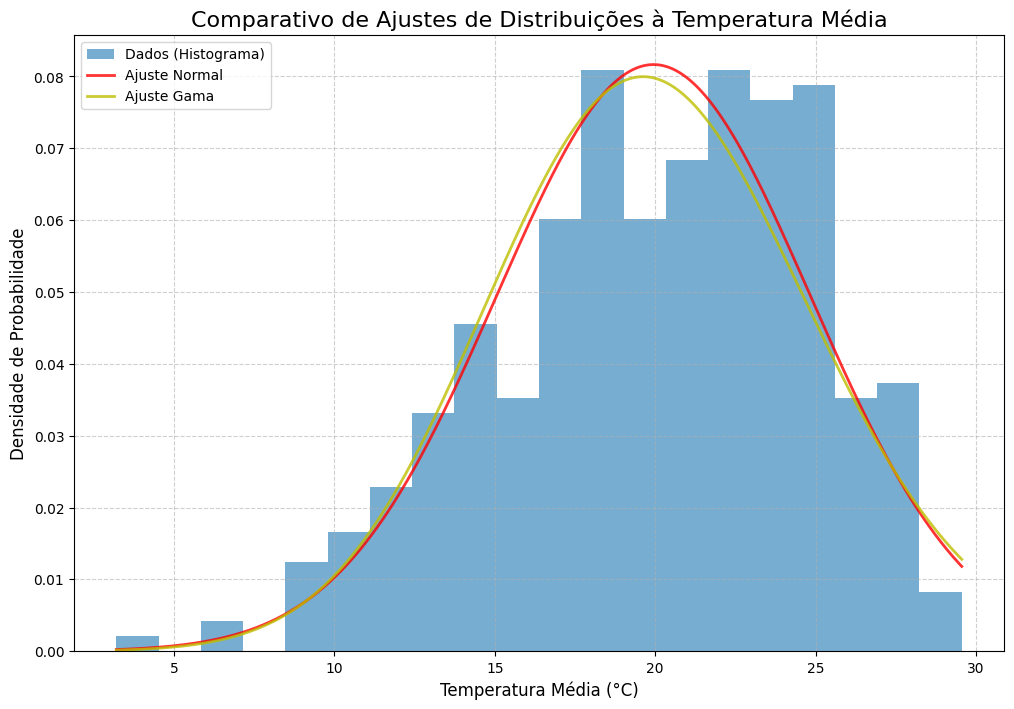

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture

# Carrega o dataset
df = pd.read_csv('temperatura_poa.csv', sep=';')
data = df['MED']

# --- 1. Ajuste das Distribuições ---

# Normal
mu_norm, std_norm = stats.norm.fit(data)

# Gama
alpha_gam, loc_gam, beta_gam = stats.gamma.fit(data)


# --- 2. Testes de Bondade de Ajuste com Critério Alfa Explícito ---

print("Resultados dos Testes de Kolmogorov-Smirnov (K-S)")
print("-" * 50)

# AQUI ESTÁ O CRITÉRIO (NÍVEL DE SIGNIFICÂNCIA) DEFINIDO NO CÓDIGO
alpha = 0.05
print(f"Critério de Decisão (Nível de Significância alpha): {alpha}\n")


# --- Teste para a Distribuição Normal ---
ks_stat_norm, p_value_norm = stats.kstest(data, 'norm', args=(mu_norm, std_norm))
print("Distribuição Normal:")
print(f"  P-valor calculado: {p_value_norm:.4f}")

# APLICAÇÃO DO CRITÉRIO ALPHA
if p_value_norm < alpha:
    print(f"  Conclusão: Como o p-valor é MENOR que {alpha}, REJEITA-SE a hipótese nula.")
else:
    print(f"  Conclusão: Como o p-valor é MAIOR que {alpha}, NÃO SE REJEITA a hipótese nula.")


# --- Teste para a Distribuição Gama ---
ks_stat_gam, p_value_gam = stats.kstest(data, 'gamma', args=(alpha_gam, loc_gam, beta_gam))
print("\nDistribuição Gama:")
print(f"  P-valor calculado: {p_value_gam:.4f}")

# APLICAÇÃO DO CRITÉRIO ALPHA
if p_value_gam < alpha:
    print(f"  Conclusão: Como o p-valor é MENOR que {alpha}, REJEITA-SE a hipótese nula.")
else:
    print(f"  Conclusão: Como o p-valor é MAIOR que {alpha}, NÃO SE REJEITA a hipótese nula.")



# --- 2. Plotting the most relevant distributions ---

plt.figure(figsize=(12, 8))
# Plot histogram of the data
plt.hist(data, bins=20, density=True, alpha=0.6, label='Dados (Histograma)')

# Create a range of x values for plotting the PDFs
x = np.linspace(data.min(), data.max(), 1000)

# Plot Normal PDF
pdf_norm = stats.norm.pdf(x, mu_norm, std_norm)
plt.plot(x, pdf_norm, 'r-', lw=2, alpha=0.8, label='Ajuste Normal')

# Plot Gamma PDF
pdf_gam = stats.gamma.pdf(x, alpha_gam, loc=loc_gam, scale=beta_gam)
plt.plot(x, pdf_gam, 'y-', lw=2, alpha=0.8, label='Ajuste Gama')


plt.title('Comparativo de Ajustes de Distribuições à Temperatura Média', fontsize=16)
plt.xlabel('Temperatura Média (°C)', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('comparativo_ajustes.png')


# Ajustes de distribuições GMM
# Teste de Hipóteses (K-S)

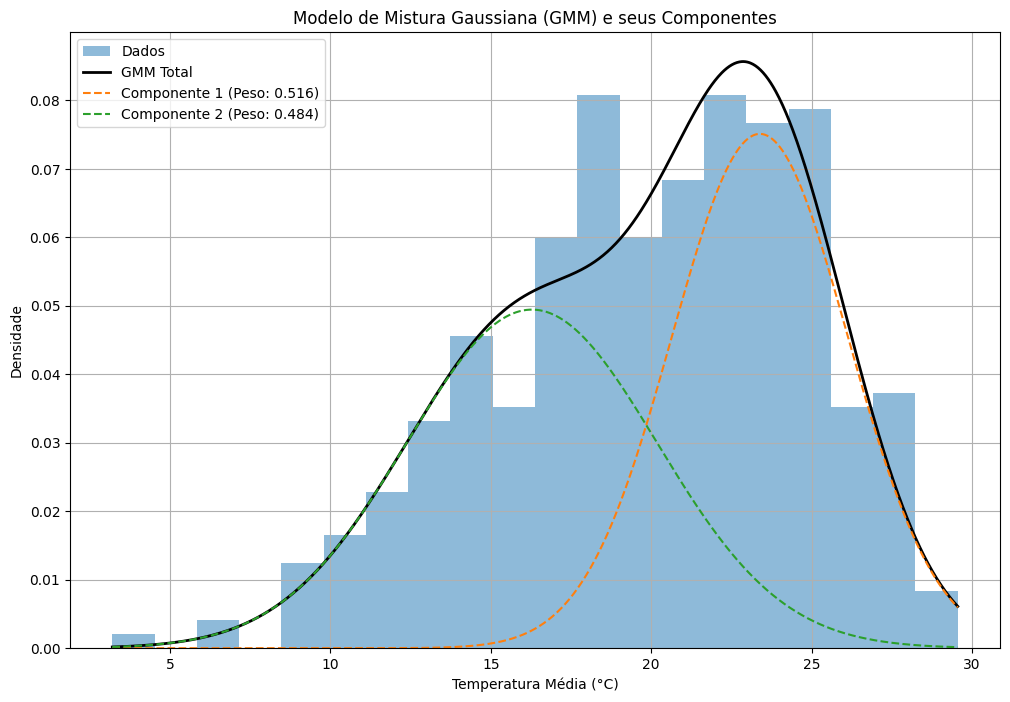

Parâmetros das Distribuições Normais dos Componentes do GMM:

--- Componente 1 ---
  Tipo de Distribuição: Normal (Gaussiana)
  Média (μ): 23.39 °C
  Desvio Padrão (σ): 2.74 °C
  Peso (proporção): 0.516

--- Componente 2 ---
  Tipo de Distribuição: Normal (Gaussiana)
  Média (μ): 16.28 °C
  Desvio Padrão (σ): 3.90 °C
  Peso (proporção): 0.484


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture

# Load the dataset
df = pd.read_csv('temperatura_poa.csv', sep=';')
data = df['MED']
data_col = data.values.reshape(-1, 1)

# --- 1. Fit GMM and Extract Components ---
gmm = GaussianMixture(n_components=2, random_state=0).fit(data_col)

weights = gmm.weights_
means = gmm.means_.flatten()
covars = gmm.covariances_.flatten()
std_devs = np.sqrt(covars)

# --- 2. Plot GMM and its Components ---
plt.figure(figsize=(12, 8))
x = np.linspace(data.min(), data.max(), 1000)

# Plot histogram
plt.hist(data, bins=20, density=True, alpha=0.5, label='Dados')

# Plot overall GMM PDF
log_pdf_gmm = gmm.score_samples(x.reshape(-1, 1))
pdf_gmm = np.exp(log_pdf_gmm)
plt.plot(x, pdf_gmm, 'k-', lw=2, label='GMM Total')

# Plot individual components with corrected label format
for i in range(gmm.n_components):
    pdf_component = weights[i] * stats.norm.pdf(x, means[i], std_devs[i])
    # Alteração na legenda do gráfico
    plt.plot(x, pdf_component, '--', label=f'Componente {i+1} (Peso: {weights[i]:.3f})')

plt.title('Modelo de Mistura Gaussiana (GMM) e seus Componentes')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.savefig('gmm_components.png')
plt.show()


# --- 3. Print the parameters for each component ---
print("Parâmetros das Distribuições Normais dos Componentes do GMM:")
for i in range(gmm.n_components):
    print(f"\n--- Componente {i+1} ---")
    print(f"  Tipo de Distribuição: Normal (Gaussiana)")
    print(f"  Média (μ): {means[i]:.2f} °C")
    print(f"  Desvio Padrão (σ): {std_devs[i]:.2f} °C")
    # Alteração na impressão do peso
    print(f"  Peso (proporção): {weights[i]:.3f}")

# QQ Plot para cada distribuição ajustada

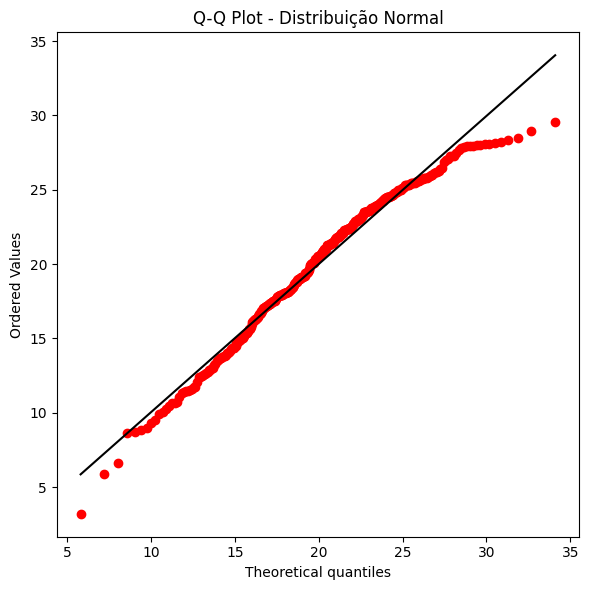

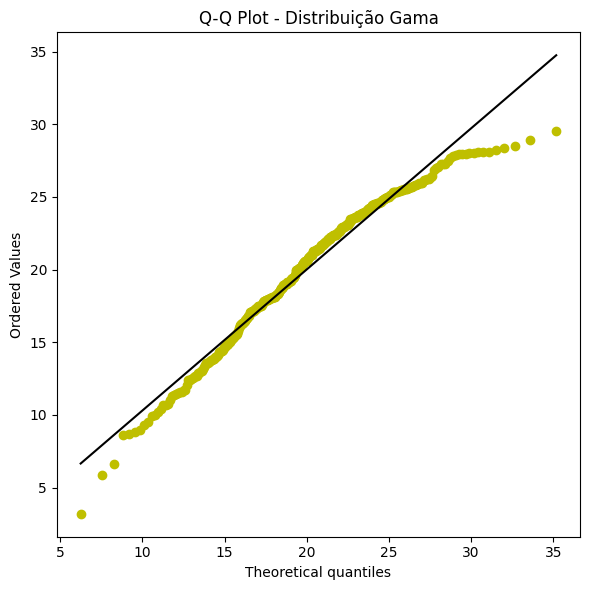

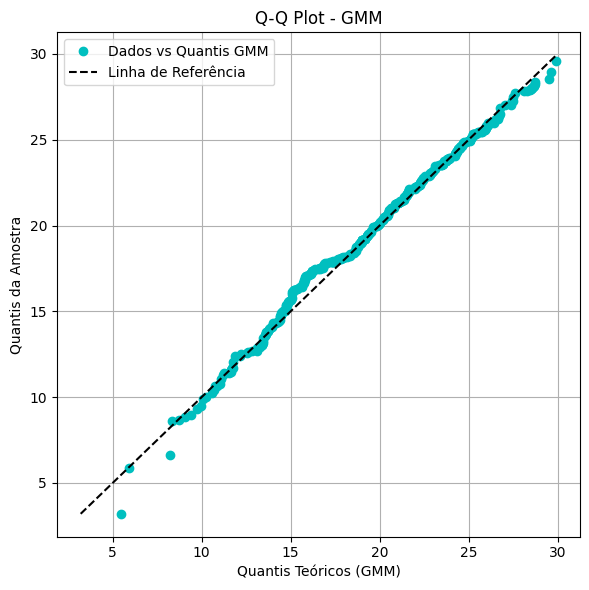

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture

# Carregar os dados
df = pd.read_csv('temperatura_poa.csv', sep=';')
data = df['MED']

# Ajustar distribuições
# Normal
mu_norm, std_norm = stats.norm.fit(data)
# Gama
alpha_gam, loc_gam, beta_gam = stats.gamma.fit(data)
# GMM
gmm = GaussianMixture(n_components=2, random_state=0).fit(data.values.reshape(-1, 1))

# --- Q-Q Plot: Normal ---
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", sparams=(mu_norm, std_norm), plot=plt)
plt.title("Q-Q Plot - Distribuição Normal")
plt.gca().get_lines()[0].set_markerfacecolor('r')
plt.gca().get_lines()[0].set_markeredgecolor('r')
plt.gca().get_lines()[1].set_color('k')
plt.tight_layout()
plt.savefig("qq_normal.png")
plt.show()

# --- Q-Q Plot: Gama ---
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="gamma", sparams=(alpha_gam, loc_gam, beta_gam), plot=plt)
plt.title("Q-Q Plot - Distribuição Gama")
plt.gca().get_lines()[0].set_markerfacecolor('y')
plt.gca().get_lines()[0].set_markeredgecolor('y')
plt.gca().get_lines()[1].set_color('k')
plt.tight_layout()
plt.savefig("qq_gamma.png")
plt.show()

# --- Q-Q Plot: GMM (manual) ---
n_samples = len(data)
theoretical_quantiles = np.quantile(gmm.sample(n_samples)[0], np.linspace(0, 1, n_samples))
sample_quantiles = np.quantile(data, np.linspace(0, 1, n_samples))

plt.figure(figsize=(6, 6))
plt.plot(theoretical_quantiles, sample_quantiles, 'o', c='c', label="Dados vs Quantis GMM")
min_val = min(np.min(theoretical_quantiles), np.min(sample_quantiles))
max_val = max(np.max(theoretical_quantiles), np.max(sample_quantiles))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label="Linha de Referência")
plt.xlabel("Quantis Teóricos (GMM)")
plt.ylabel("Quantis da Amostra")
plt.title("Q-Q Plot - GMM")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("qq_gmm.png")
plt.show()
